# Principal Component Analysis

- Reducing high-dimensional data to two or three dimensions so that it can be plotted and explored
- Reducing the number of dimensions in a dataset and then restoring the original number of dimensions, which finds application in anomaly detection and noise filtering
- Anonymizing datasets so that they can be shared with others without revealing the nature or meaning of the data

#### A logical question to ask is, what is the “right” number of components? In other words, what number of components strikes the best balance between reducing the number of dimensions in the dataset and retaining most of the information? One way to find that number is with a scree plot, which charts the proportion of explained variance for each dimension. The following code produces a scree plot for the PCA transform used on the facial images:

In [ ]:

import seaborn as sns
sns.set()

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')

import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

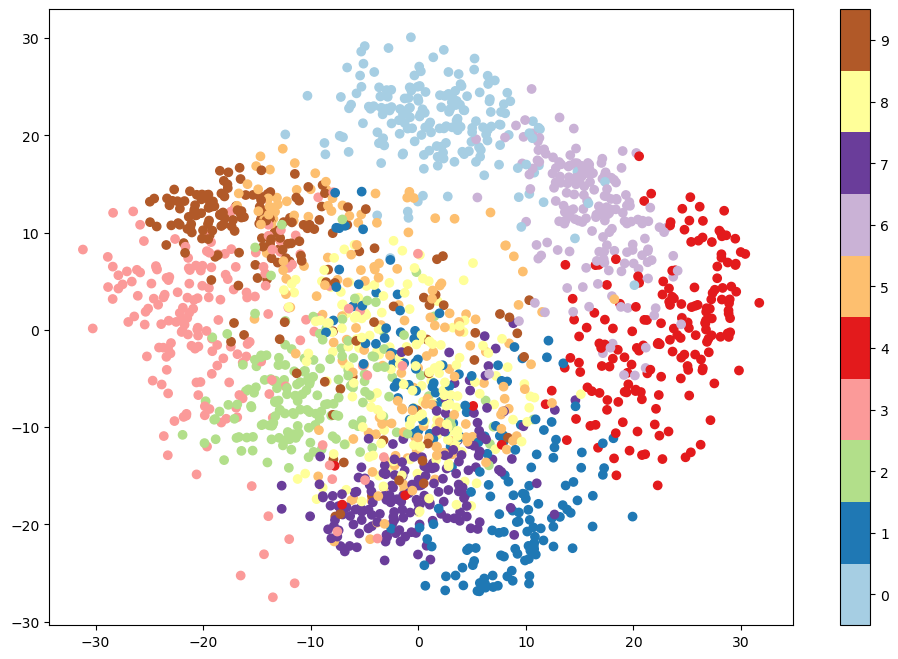

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

digits = load_digits()
pca = PCA(n_components=2, random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_digits[:, 0], pca_digits[:, 1], c=digits.target,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

#### PCA isn’t the only way to reduce a dataset to two or three dimensions for plotting. You can also use Scikit’s Isomap class or its TSNE class. TSNE implements t-distributed stochastic neighbor embedding, or t-SNE for short. t-SNE is a dimensionality reduction algorithm that is used almost exclusively for visualizing high-dimensional data. Whereas PCA uses a linear function to transform data, t-SNE uses a nonlinear transform that tends to heighten the separation between classes by keeping similar data points close together in low-dimensional space. (PCA, by contrast, focuses on keeping dissimilar points far apart.) Here’s an example that plots the Digits dataset in two dimensions after reducing it with t-SNE:

/Users/maukanmir/miniforge3/envs/machine-learning-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


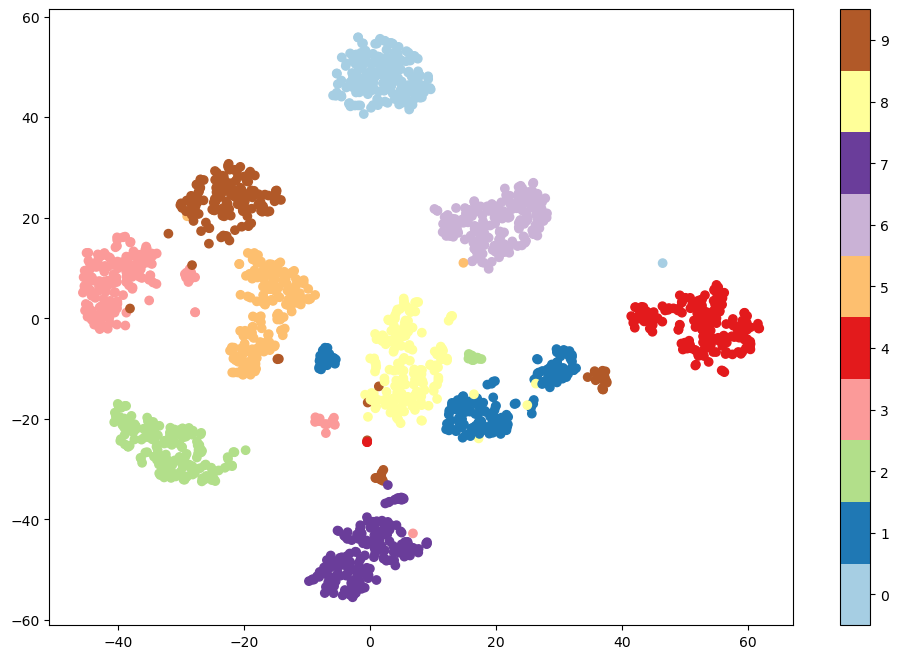

In [2]:
%matplotlib inline
from sklearn.manifold import TSNE

digits = load_digits()
tsne = TSNE(n_components=2, init='pca', learning_rate='auto',
            random_state=0)
tsne_digits = tsne.fit_transform(digits.data)

plt.figure(figsize=(12, 8))
plt.scatter(tsne_digits[:, 0], tsne_digits[:, 1], c=digits.target,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

#### t-SNE does a better job of separating groups of digits into clusters, indicating there are patterns in the data that machine learning can exploit. The chief drawback is that t-SNE is compute intensive, which means it can take a prohibitively long time to run on large datasets. One way to mitigate that is to run t-SNE on a subset of rows rather than the entire dataset. Another strategy is to use PCA to reduce the number of dimensions, and then subject the PCAed dataset to t-SNE.